<a href="https://colab.research.google.com/github/haesookimDev/FLSMal/blob/main/extractFeatureImportances.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import os

In [3]:
!pwd

/content


In [4]:
%cd drive/MyDrive/FSLMal

/content/drive/MyDrive/FSLMal


In [5]:
!ls

CustomDataset.py   Data.zip		 MalClassifierForFSL.py
Data		   extractTrainData.csv  __pycache__
data_labelFSL.csv  logs			 TrainCNNForFSL.ipynb


In [6]:
df = pd.read_csv('./extractTrainData.csv')

In [13]:
df.drop(['Unnamed: 0'], inplace=True, axis=1)

In [7]:
from sklearn.tree import DecisionTreeClassifier

In [8]:
dt = DecisionTreeClassifier()

In [9]:
dt.fit(df.iloc[:,:-1], df.iloc[:,-1])

DecisionTreeClassifier()

In [14]:
df.columns

Index(['i_0', 'i_1', 'i_2', 'i_3', 'i_4', 'i_5', 'i_6', 'i_7', 'i_8', 'i_9',
       ...
       't_231', 't_232', 't_233', 't_234', 't_235', 't_236', 't_237', 't_238',
       't_239', 'label'],
      dtype='object', length=4465)

In [15]:
ser = pd.Series(dt.feature_importances_, index=df.columns)

In [16]:
top15 = ser.sort_values(ascending=False)[:15]
print(top15)

i_0       1.0
i_2975    0.0
i_2981    0.0
i_2980    0.0
i_2979    0.0
i_2978    0.0
i_2977    0.0
i_2976    0.0
i_2974    0.0
i_2966    0.0
i_2973    0.0
i_2972    0.0
i_2971    0.0
i_2970    0.0
i_2969    0.0
dtype: float64


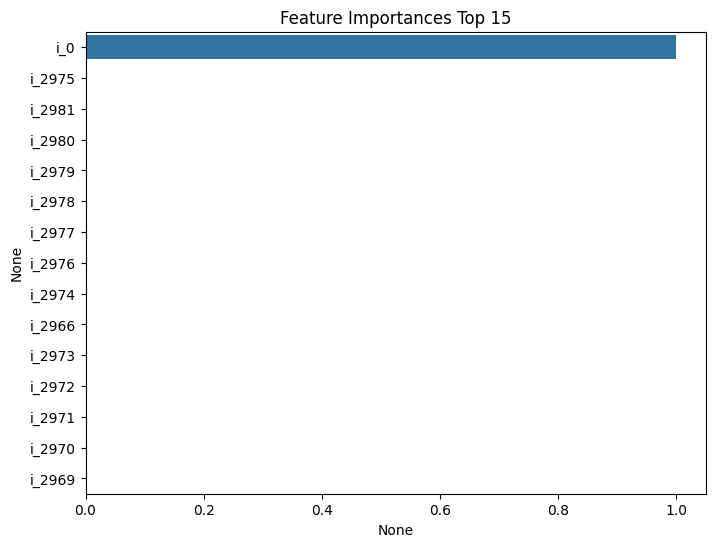

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
plt.title('Feature Importances Top 15')
sns.barplot(x=top15, y=top15.index)
plt.show()